In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import random

In [3]:
N = 100000 #50000
T_1 = 100000 #5000 ns
times = [1, 4, 10, 50, 250, 1000, 5000] #these are samples, real time would be *8 (sampling time = 8ns)

mean_C0 = (0.1, 0.2)
cov_C0 = [[1, 0], [0, 1]]

mean_C1 = (0.8, 0.1)
cov_C1 = [[0.6, 0], [0, 0.6]]


pts_C0 = np.random.multivariate_normal(mean_C0, cov_C0, size=N)
#pts_C1 = np.random.multivariate_normal(mean_C1, cov_C1, size=N)

#print(pts_C0[:])

data_C1_non_averaged = [] #4D structure: [pts_C1_t_non_avg(different integration times)[measurement_chunk(different measurements with the same time)[sample(single data point), ...], ...], ...]
data_C1_averaged = [] #3D

for t in times:
    print("integration time = ", t)
    
    #decay_prob = 1 - math.exp(-(t * 8)/ T_1)
    
    chunks_C0 = [pts_C0[i * t:(i + 1) * t] for i in range(int(N/t))]
    
    pts_C1_t_non_avg = [] #3D
    pts_C1_t_avg = [] #2D
    
    classes = [0, 1]
    
    for measurement in range(int(N/t)):
        is_T1 = 1
        print("measurement no. ", measurement, "in int time ", t)
        measurement_chunk = [] #2D
        for sample in range(t):
            is_T1 = random.choices(classes, weights = [1 - math.exp(-((sample+1) * 8)/ T_1), math.exp(-((sample+1) * 8)/ T_1)] , k=1)
            #print(is_T1)
            if is_T1 == [1]:
                IQ_pt = np.random.multivariate_normal(mean_C1, cov_C1, size=1)
                #print(IQ_pt[0])
                measurement_chunk.append(IQ_pt[0])
                #print(measurement_chunk)
                
            else:
                remaining = int(t - sample)
                IQ_pts = np.random.multivariate_normal(mean_C0, cov_C0, size=remaining)
                #print(IQ_pts[:])
                for i in IQ_pts[:]:
                    measurement_chunk.append(i)
                #print(measurement_chunk)
                break
        
        pts_C1_t_non_avg.append(measurement_chunk)
        #print("pts_C1_non: ", pts_C1_t_non_avg)
        
        measurement_chunk_avg = np.mean(measurement_chunk, axis=0)
        #print("chunk: ", measurement_chunk)
        #print("chunk_avg: ", measurement_chunk_avg)
        
        pts_C1_t_avg.append(measurement_chunk_avg)
        #print("pts_C1_avg: ", pts_C1_t_avg)
        
    data_C1_non_averaged.append(pts_C1_t_non_avg)
    #print(len(data_C1_non_averaged), len(data_C1_non_averaged[0]),len(data_C1_non_averaged[0][0]), len(data_C1_non_averaged[0][0][0]))
    
    data_C1_averaged.append(pts_C1_t_avg)
    #print(len(data_C1_averaged), len(data_C1_averaged[0]), len(data_C1_averaged[0][0]))
    
        
    

integration time =  1
measurement no.  0 in int time  1
measurement no.  1 in int time  1
measurement no.  2 in int time  1
measurement no.  3 in int time  1
measurement no.  4 in int time  1
measurement no.  5 in int time  1
measurement no.  6 in int time  1
measurement no.  7 in int time  1
measurement no.  8 in int time  1
measurement no.  9 in int time  1
measurement no.  10 in int time  1
measurement no.  11 in int time  1
measurement no.  12 in int time  1
measurement no.  13 in int time  1
measurement no.  14 in int time  1
measurement no.  15 in int time  1
measurement no.  16 in int time  1
measurement no.  17 in int time  1
measurement no.  18 in int time  1
measurement no.  19 in int time  1
measurement no.  20 in int time  1
measurement no.  21 in int time  1
measurement no.  22 in int time  1
measurement no.  23 in int time  1
measurement no.  24 in int time  1
measurement no.  25 in int time  1
measurement no.  26 in int time  1
measurement no.  27 in int time  1
measurem

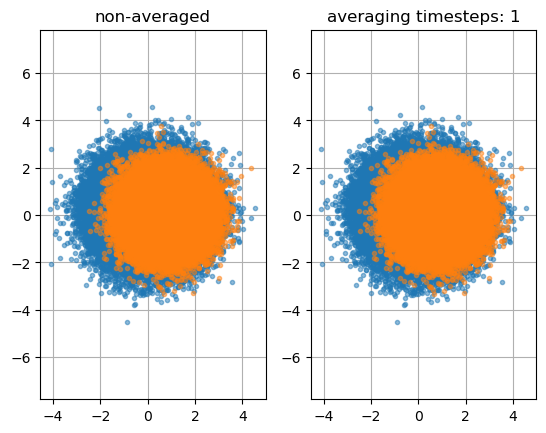

In [13]:
C1_t0_arr = np.array(data_C1_non_averaged[0])

pts_C0_t0_avg = []
for measurement in range(int(N / times[0])):
    pts_C0_t0_avg.append(np.mean(pts_C0[measurement * times[0]:(measurement + 1) * times[0]], axis=0))
pts_C0_t0_avg = np.array(pts_C0_t0_avg)

C1_t0_avg_arr = np.array(data_C1_averaged[0])

plt.subplot(1, 2, 1)
plt.plot(pts_C0[:, 0], pts_C0[:, 1], '.', alpha=0.5)
plt.plot(C1_t0_arr[:,:,0], C1_t0_arr[:,:,1], '.', alpha=0.5)
plt.axis('equal')
plt.title("non-averaged")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(pts_C0_t0_avg[:, 0], pts_C0_t0_avg[:, 1], '.', alpha=0.5)
plt.plot(C1_t0_avg_arr[:,0], C1_t0_avg_arr[:,1], '.', alpha=0.5)
plt.axis('equal')
plt.title(f'averaging timesteps: {times[0]}')
plt.grid()
plt.show()

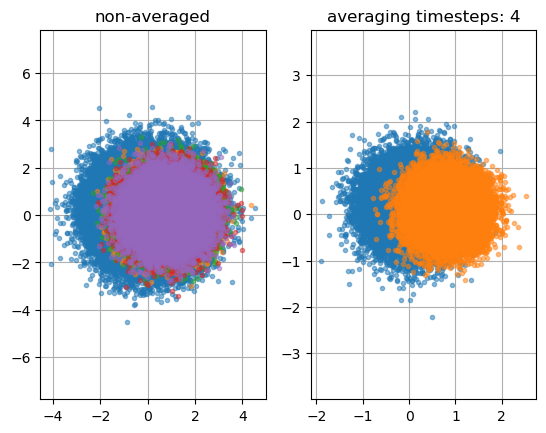

In [14]:
C1_t1_arr = np.array(data_C1_non_averaged[1])

pts_C0_t1_avg = []
for measurement in range(int(N / times[1])):
    pts_C0_t1_avg.append(np.mean(pts_C0[measurement * times[1]:(measurement + 1) * times[1]], axis=0))
pts_C0_t1_avg = np.array(pts_C0_t1_avg)

C1_t1_avg_arr = np.array(data_C1_averaged[1])

plt.subplot(1, 2, 1)
plt.plot(pts_C0[:, 0], pts_C0[:, 1], '.', alpha=0.5)
plt.plot(C1_t1_arr[:,:,0], C1_t1_arr[:,:,1], '.', alpha=0.5)
plt.axis('equal')
plt.title("non-averaged")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(pts_C0_t1_avg[:, 0], pts_C0_t1_avg[:, 1], '.', alpha=0.5)
plt.plot(C1_t1_avg_arr[:,0], C1_t1_avg_arr[:,1], '.', alpha=0.5)
plt.axis('equal')
plt.title(f'averaging timesteps: {times[1]}')
plt.grid()
plt.show()

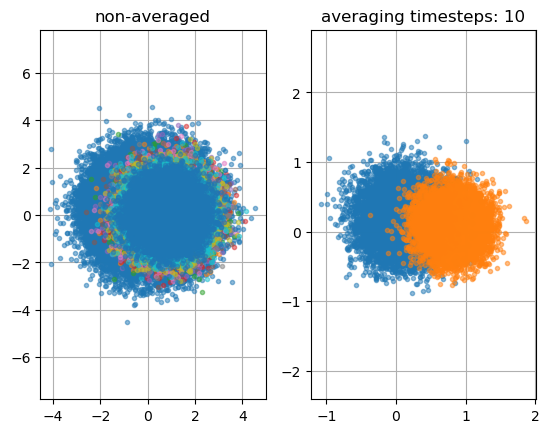

In [15]:
C1_t2_arr = np.array(data_C1_non_averaged[2])

pts_C0_t2_avg = []
for measurement in range(int(N / times[2])):
    pts_C0_t2_avg.append(np.mean(pts_C0[measurement * times[2]:(measurement + 1) * times[2]], axis=0))
pts_C0_t2_avg = np.array(pts_C0_t2_avg)

C1_t2_avg_arr = np.array(data_C1_averaged[2])

plt.subplot(1, 2, 1)
plt.plot(pts_C0[:, 0], pts_C0[:, 1], '.', alpha=0.5)
plt.plot(C1_t2_arr[:,:,0], C1_t2_arr[:,:,1], '.', alpha=0.5)
plt.axis('equal')
plt.title("non-averaged")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(pts_C0_t2_avg[:, 0], pts_C0_t2_avg[:, 1], '.', alpha=0.5)
plt.plot(C1_t2_avg_arr[:,0], C1_t2_avg_arr[:,1], '.', alpha=0.5)
plt.axis('equal')
plt.title(f'averaging timesteps: {times[2]}')
plt.grid()
plt.show()

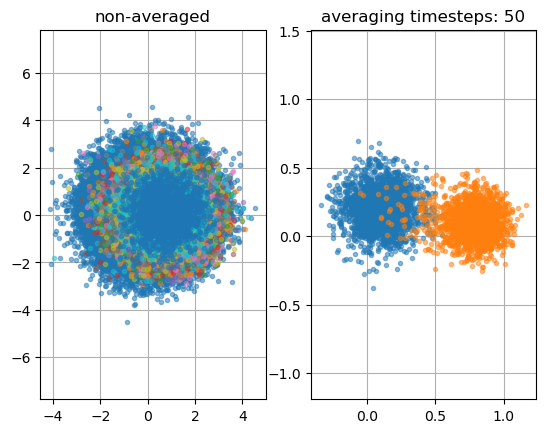

In [16]:
C1_t3_arr = np.array(data_C1_non_averaged[3])

pts_C0_t3_avg = []
for measurement in range(int(N / times[3])):
    pts_C0_t3_avg.append(np.mean(pts_C0[measurement * times[3]:(measurement + 1) * times[3]], axis=0))
pts_C0_t3_avg = np.array(pts_C0_t3_avg)

C1_t3_avg_arr = np.array(data_C1_averaged[3])

plt.subplot(1, 2, 1)
plt.plot(pts_C0[:, 0], pts_C0[:, 1], '.', alpha=0.5)
plt.plot(C1_t3_arr[:,:,0], C1_t3_arr[:,:,1], '.', alpha=0.5)
plt.axis('equal')
plt.title("non-averaged")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(pts_C0_t3_avg[:, 0], pts_C0_t3_avg[:, 1], '.', alpha=0.5)
plt.plot(C1_t3_avg_arr[:,0], C1_t3_avg_arr[:,1], '.', alpha=0.5)
plt.axis('equal')
plt.title(f'averaging timesteps: {times[3]}')
plt.grid()
plt.show()

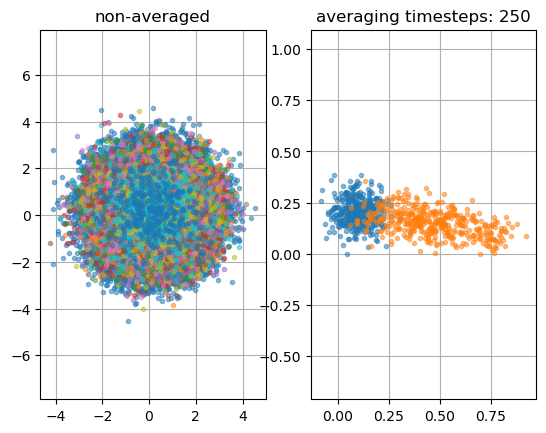

In [17]:
C1_t4_arr = np.array(data_C1_non_averaged[4])

pts_C0_t4_avg = []
for measurement in range(int(N / times[4])):
    pts_C0_t4_avg.append(np.mean(pts_C0[measurement * times[4]:(measurement + 1) * times[4]], axis=0))
pts_C0_t4_avg = np.array(pts_C0_t4_avg)

C1_t4_avg_arr = np.array(data_C1_averaged[4])

plt.subplot(1, 2, 1)
plt.plot(pts_C0[:, 0], pts_C0[:, 1], '.', alpha=0.5)
plt.plot(C1_t4_arr[:,:,0], C1_t4_arr[:,:,1], '.', alpha=0.5)
plt.axis('equal')
plt.title("non-averaged")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(pts_C0_t4_avg[:, 0], pts_C0_t4_avg[:, 1], '.', alpha=0.5)
plt.plot(C1_t4_avg_arr[:,0], C1_t4_avg_arr[:,1], '.', alpha=0.5)
plt.axis('equal')
plt.title(f'averaging timesteps: {times[4]}')
plt.grid()
plt.show()

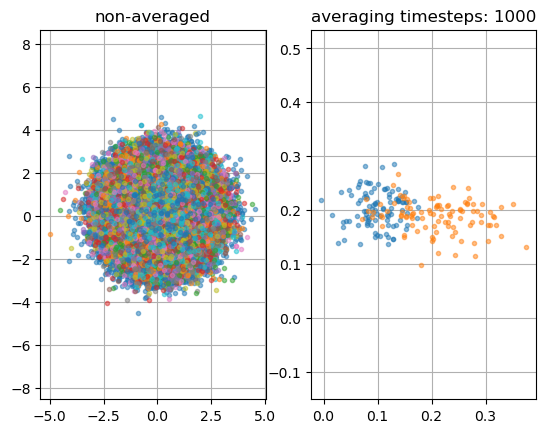

In [18]:
C1_t5_arr = np.array(data_C1_non_averaged[5])

pts_C0_t5_avg = []
for measurement in range(int(N / times[5])):
    pts_C0_t5_avg.append(np.mean(pts_C0[measurement * times[5]:(measurement + 1) * times[5]], axis=0))
pts_C0_t5_avg = np.array(pts_C0_t5_avg)

C1_t5_avg_arr = np.array(data_C1_averaged[5])

plt.subplot(1, 2, 1)
plt.plot(pts_C0[:, 0], pts_C0[:, 1], '.', alpha=0.5)
plt.plot(C1_t5_arr[:,:,0], C1_t5_arr[:,:,1], '.', alpha=0.5)
plt.axis('equal')
plt.title("non-averaged")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(pts_C0_t5_avg[:, 0], pts_C0_t5_avg[:, 1], '.', alpha=0.5)
plt.plot(C1_t5_avg_arr[:,0], C1_t5_avg_arr[:,1], '.', alpha=0.5)
plt.axis('equal')
plt.title(f'averaging timesteps: {times[5]}')
plt.grid()
plt.show()

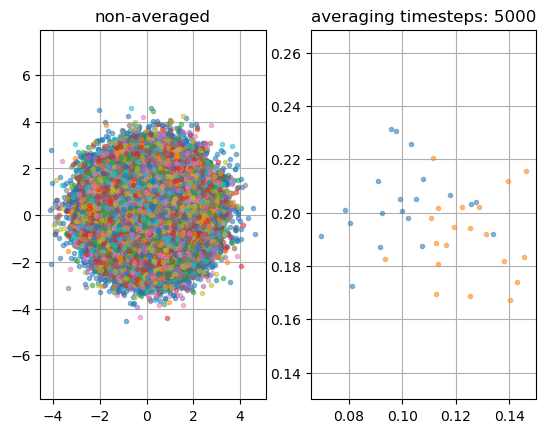

In [19]:
C1_t6_arr = np.array(data_C1_non_averaged[6])

pts_C0_t6_avg = []
for measurement in range(int(N / times[6])):
    pts_C0_t6_avg.append(np.mean(pts_C0[measurement * times[6]:(measurement + 1) * times[6]], axis=0))
pts_C0_t6_avg = np.array(pts_C0_t6_avg)

C1_t6_avg_arr = np.array(data_C1_averaged[6])

plt.subplot(1, 2, 1)
plt.plot(pts_C0[:, 0], pts_C0[:, 1], '.', alpha=0.5)
plt.plot(C1_t6_arr[:,:,0], C1_t6_arr[:,:,1], '.', alpha=0.5)
plt.axis('equal')
plt.title("non-averaged")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(pts_C0_t6_avg[:, 0], pts_C0_t6_avg[:, 1], '.', alpha=0.5)
plt.plot(C1_t6_avg_arr[:,0], C1_t6_avg_arr[:,1], '.', alpha=0.5)
plt.axis('equal')
plt.title(f'averaging timesteps: {times[6]}')
plt.grid()
plt.show()